So I found [this thread](https://forums.fast.ai/t/adding-efficientnet-to-fastai-vision/53371/10) which goes over using efficientnet-pytorch in fastai without modification.

I'm now going to try that.
I may've wasted quite a bit of time reimplementing efficientnet. Boo.

In [1]:
from pathlib import Path
from typing import List, Tuple, Callable

from fastai.vision import *
from fastai.vision.models.efficientnet import *
from efficientnet_pytorch import EfficientNet
from torch import nn
import torch

In [2]:
PROJECT_ROOT = Path('.').absolute().parents[0]
DATA_FOLDER = PROJECT_ROOT / 'data' / 'processed'
TRAIN_CSV = DATA_FOLDER / 'train.csv'
VALID_CSV = DATA_FOLDER / 'valid.csv'
CARS_FOLDER = DATA_FOLDER / 'car_data'

MODEL_NAME = 'efficientnet-b3'
IMAGE_SIZE = EfficientNet.get_image_size(MODEL_NAME)
BATCH_SIZE = 7

In [3]:
data = (
    ImageList.from_folder(CARS_FOLDER/'train')
        .split_by_rand_pct(0.1)
        .label_from_folder()
        .transform(tfms=get_transforms(), size=IMAGE_SIZE, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=BATCH_SIZE)
        .normalize(imagenet_stats)
)

In [4]:
model = EfficientNetB3(data)

Loaded pretrained weights for efficientnet-b3


In [5]:
learner = Learner(data, model, metrics=[accuracy])

In [6]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.58E-06
Min loss divided by 10: 6.31E-08


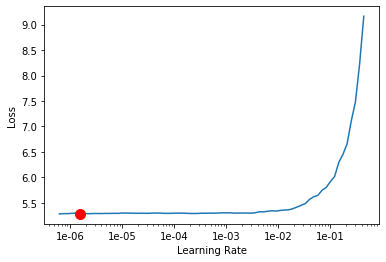

In [7]:
learner.recorder.plot(suggestion=True)

In [8]:
learner.fit_fc(4)

TypeError: unsupported operand type(s) for *: 'float' and 'slice'

So it still has the same problem that my one had.
I wonder why.

Anyway I can get around this by specifying an exact training rate.

In [9]:
learner.fit_fc(4, lr=3e-3)

This is insane.
1% accuracy.
I must be doing something wrong.

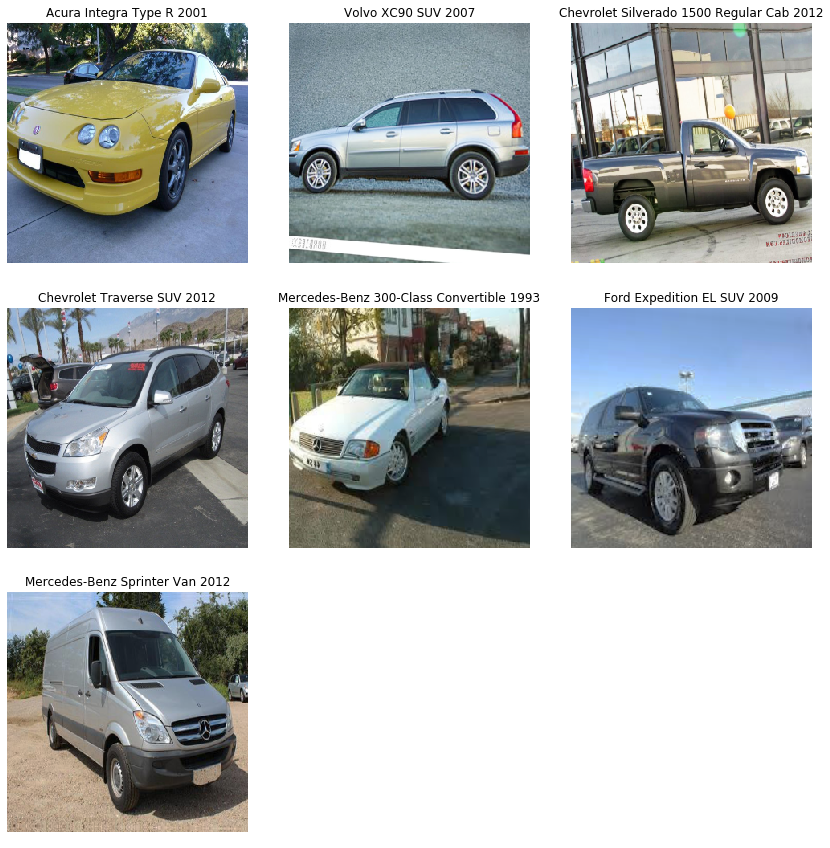

In [10]:
data.show_batch()

In [11]:
EfficientNetB3??

Signature: EfficientNetB3(data)
Docstring: <no docstring>
Source:    def EfficientNetB3(data): return EfficientNet.from_pretrained('efficientnet-b3', num_classes=data.c)
File:      ~/.local/share/virtualenvs/dl-efficientnet-2HnqaFbf/lib/python3.7/site-packages/fastai/vision/models/efficientnet.py
Type:      function


It is pretrained and the iamges look reasonable.
I really don't understand why it is performing so badly.

I have read that thread more and found [this repo](https://github.com/rwightman/gen-efficientnet-pytorch) which seems to be an improvement.
Going to try that now.